In [1]:
# Dynamic Forecast with Fourier terms
import pandas as pd
df = pd.read_csv(r'C:\Users\Admin\Downloads\Archive\DelhiTemp.csv')
df['date'] = pd.to_datetime(df.date)
df = df.set_index('date')

In [2]:
print(df)

             meantemp
date                 
2013-01-01  10.000000
2013-01-02   7.400000
2013-01-03   7.166667
2013-01-04   8.666667
2013-01-05   6.000000
...               ...
2017-04-20  34.500000
2017-04-21  34.250000
2017-04-22  32.900000
2017-04-23  32.875000
2017-04-24  32.000000

[1575 rows x 1 columns]


<AxesSubplot:xlabel='date'>

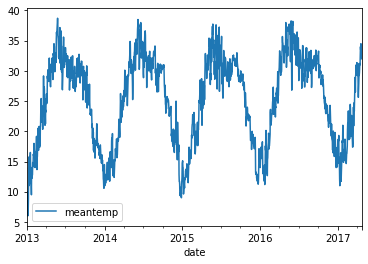

In [3]:
df.plot()

In [4]:
y_to_train = df.iloc[:(len(df)-365)]
y_to_test = df.iloc[(len(df)-365):] # last year for testing

In [5]:
y_to_test

,meantemp
date,
2016-04-25,31.750000
2016-04-26,33.437500
2016-04-27,33.125000
2016-04-28,34.153846
2016-04-29,34.071429
...,...
2017-04-20,34.500000
2017-04-21,34.250000
2017-04-22,32.900000


In [6]:
!pip install tbats

In [7]:
from tbats import TBATS, BATS
# Fit the model
estimator = TBATS(seasonal_periods=(7, 365.25))
model = estimator.fit(y_to_train)
# Forecast 365 days ahead
y_forecast = model.forecast(steps=365)

In [8]:
! pip install pmdarima

In [9]:
from pmdarima import auto_arima
import numpy as np
# prepare Fourier terms use 365.2 for leap year
exog = pd.DataFrame({'date': df.index})
exog = exog.set_index(pd.PeriodIndex(exog['date'], freq='D'))
exog['sin365'] = np.sin(2 * np.pi * exog.index.dayofyear / 365.25)
exog['cos365'] = np.cos(2 * np.pi * exog.index.dayofyear / 365.25)
exog['sin365_2'] = np.sin(4 * np.pi * exog.index.dayofyear / 365.25)
exog['cos365_2'] = np.cos(4 * np.pi * exog.index.dayofyear / 365.25)
exog = exog.drop(columns=['date'])
exog_to_train = exog.iloc[:(len(df)-365)]
exog_to_test = exog.iloc[(len(df)-365):]
# Fit model
arima_exog_model = auto_arima(y=y_to_train, exogenous=exog_to_train, seasonal=True, m=7)
# Forecast
y_arima_exog_forecast = pd.DataFrame(arima_exog_model.predict(n_periods=365, exogenous=exog_to_test), index = y_to_test.index)

In [10]:
y_arima_exog_forecast.columns = ['predict_temp']
y_arima_exog_forecast

,predict_temp
date,
2016-04-25,32.038148
2016-04-26,32.598706
2016-04-27,33.027578
2016-04-28,33.318424
2016-04-29,33.566241
...,...
2017-04-20,33.434345
2017-04-21,33.595081
2017-04-22,33.751901


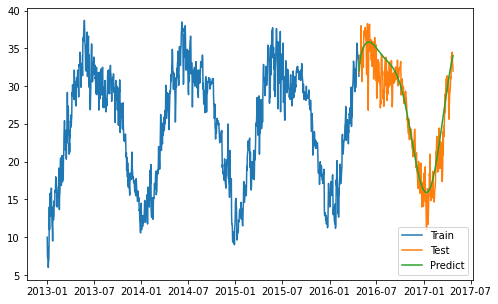

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize= (8,5))
plt.plot(y_to_train, label = "Train")
plt.plot(y_to_test, label = "Test")
plt.plot(y_arima_exog_forecast, label = "Predict")
plt.legend(loc = "lower right")
plt.show()

In [12]:
import sklearn.metrics
from sklearn.metrics import r2_score

In [13]:
y_to_test['prediction'] = y_arima_exog_forecast

C:\Users\Admin\AppData\Local\Temp/ipykernel_12340/4063535699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_to_test['prediction'] = y_arima_exog_forecast


In [14]:
y_to_test

,meantemp,prediction
date,,
2016-04-25,31.750000,32.038148
2016-04-26,33.437500,32.598706
2016-04-27,33.125000,33.027578
2016-04-28,34.153846,33.318424
2016-04-29,34.071429,33.566241
...,...,...
2017-04-20,34.500000,33.434345
2017-04-21,34.250000,33.595081
2017-04-22,32.900000,33.751901


In [15]:
r2_score(y_to_test['meantemp'], y_to_test['prediction'])

0.8790334021439604

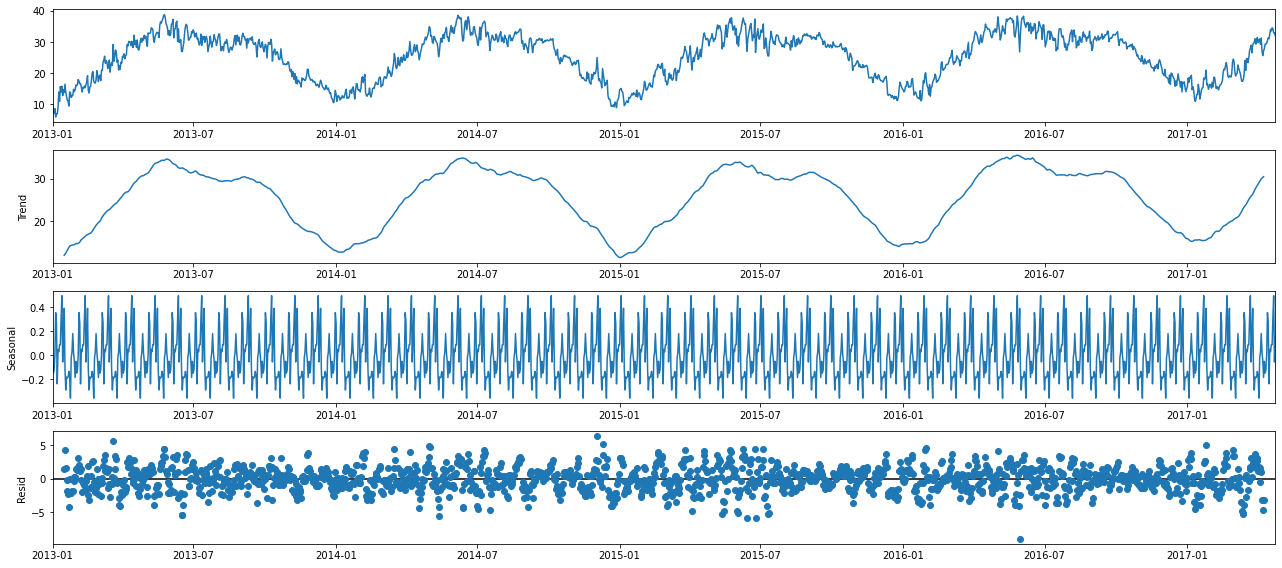

In [16]:
# Seasonal forecast with SARIMAX
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df, model='additive', period = 30)
fig = decomposition.plot()
plt.show()

In [28]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.375315
p-value: 0.148825


In [131]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,4), 'figure.dpi':120})

In [288]:
# Dynamic Forecast with Fourier terms
import pandas as pd
data = pd.read_csv(r'C:\Users\Admin\Downloads\Archive\DelhiTemp.csv', parse_dates=['date'], index_col='date')

In [289]:
data.head()

,meantemp
date,
2013-01-01,10.000000
2013-01-02,7.400000
2013-01-03,7.166667
2013-01-04,8.666667
2013-01-05,6.000000


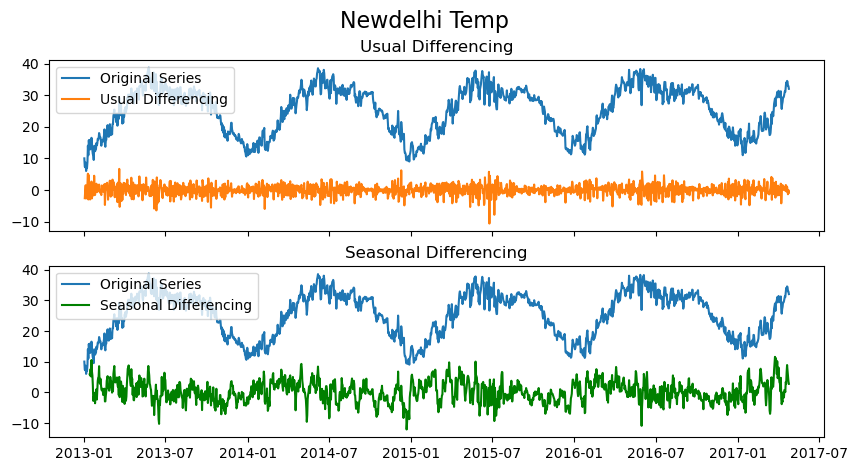

In [290]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Newdelhi Temp', fontsize=16)
plt.show()

In [33]:
# !pip3 install pyramid-arima
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(df, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=365,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=5.63 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=8264.932, Time=0.09 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=6529.023, Time=1.53 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=7386.038, Time=1.19 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=8267.027, Time=0.09 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=6915.844, Time=0.28 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=6379.132, Time=3.66 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=21.02 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=4.42 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=8221.595, Time=2.92 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=6365.293, Time=5.05 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=6523.134, Time=2.16 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=21.37 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=9.38 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AIC

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1575
Model:             SARIMAX(3, 0, 2)x(2, 1, [], 12)   Log Likelihood               -3143.143
Date:                             Sat, 23 Apr 2022   AIC                           6302.285
Time:                                     23:53:02   BIC                           6345.120
Sample:                                          0   HQIC                          6318.210
                                            - 1575                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.7038      0.029     93.327      0.000       2.647       2.761
ar.L2         -2.4227      0.055    -44.082      0.000      -2.530      -2.315
ar.L3          0.7186      0.026     27.175      0.000       0.667       0.770
ma.L1         -1.9282      0.021    -92.244      0.000      -1.969      -1.887
ma.L2          0.9342      0.020     47.846      0.000       0.896       0.972
ar.S.L12      -0.6618      0.020    -32.684      0.000      -0.702      -0.622
ar.S.L24      -0.3388      0.022    -15.515      0.000      -0.382      -0.296
sigma2         3.1732      0.093     34.239      0.000       2.992       3.355
===================================================================================
Ljung-Box (L1) (Q):                   1.01   Jarque-Bera (JB):               107.98
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                            -0.28
Prob(H) (two-sided):                  0.35   Kurtosis:                         4.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

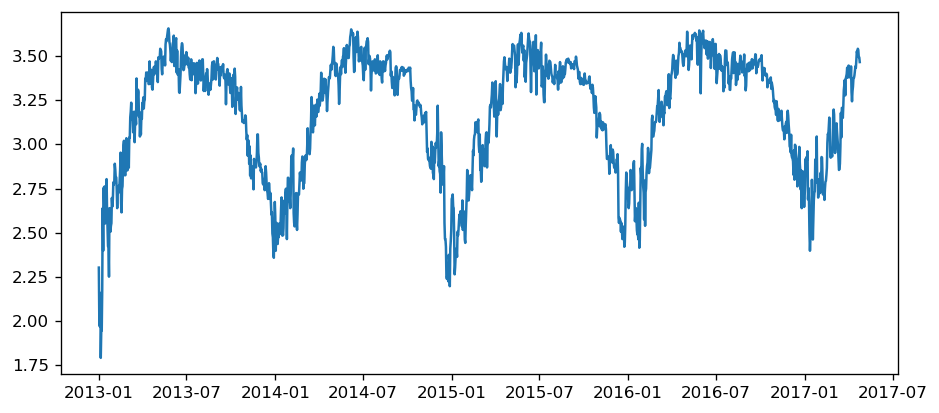

In [48]:
ts_log = np.log(df)
plt.plot(ts_log)

In [39]:
result = adfuller(ts_log.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -4.029702
p-value: 0.001263


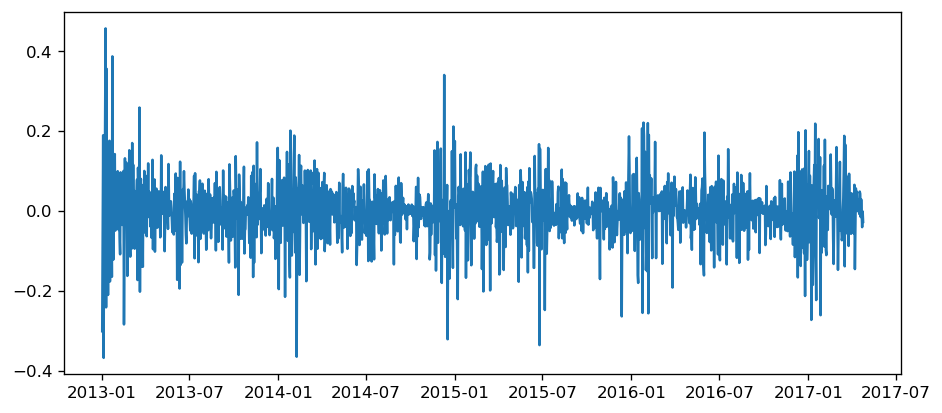

In [49]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

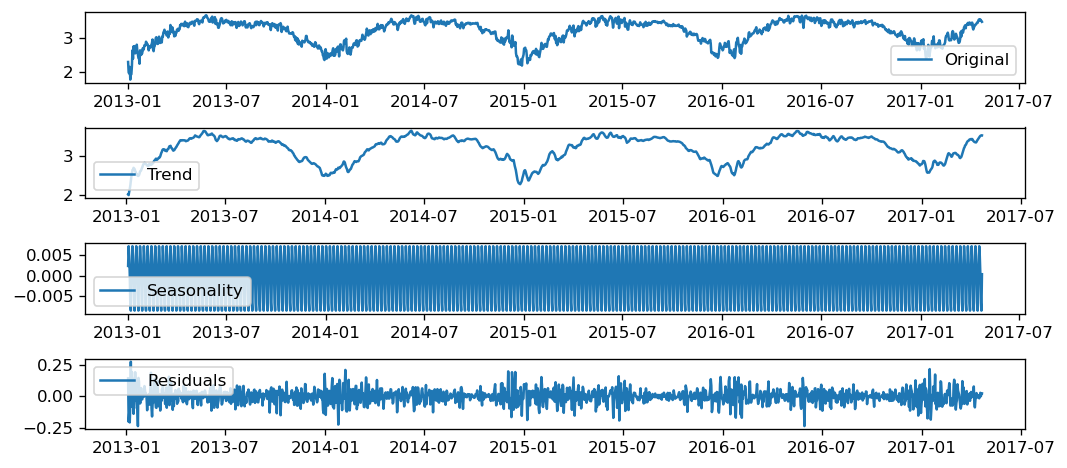

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [59]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
result = adfuller(ts_log_decompose.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -15.315135
p-value: 0.000000


In [61]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Text(0.5, 1.0, 'Autocorrelation Function')

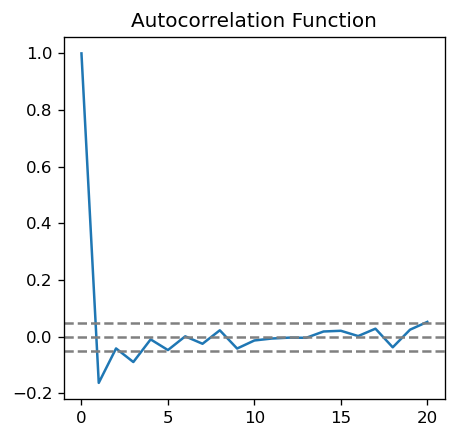

In [62]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

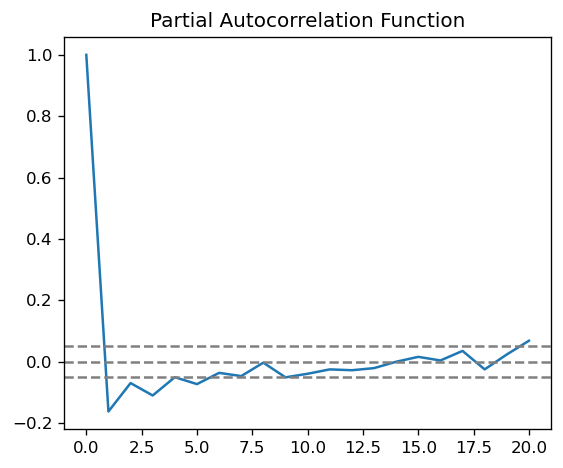

In [63]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


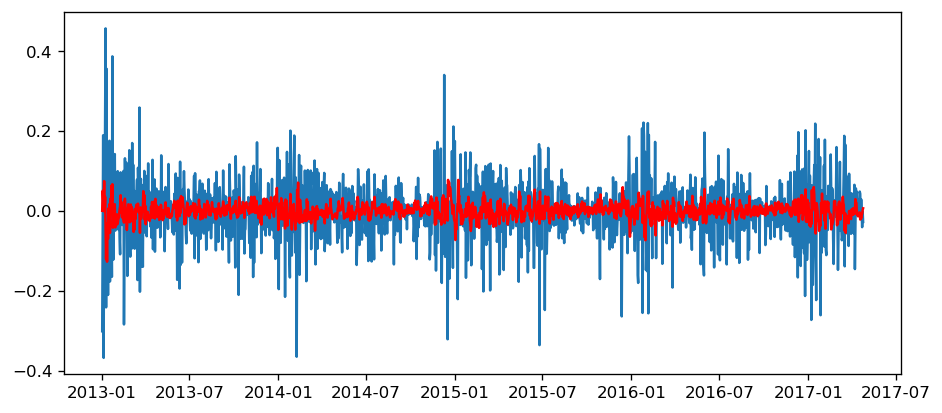

In [68]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts_log, order=(2, 1, 5))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


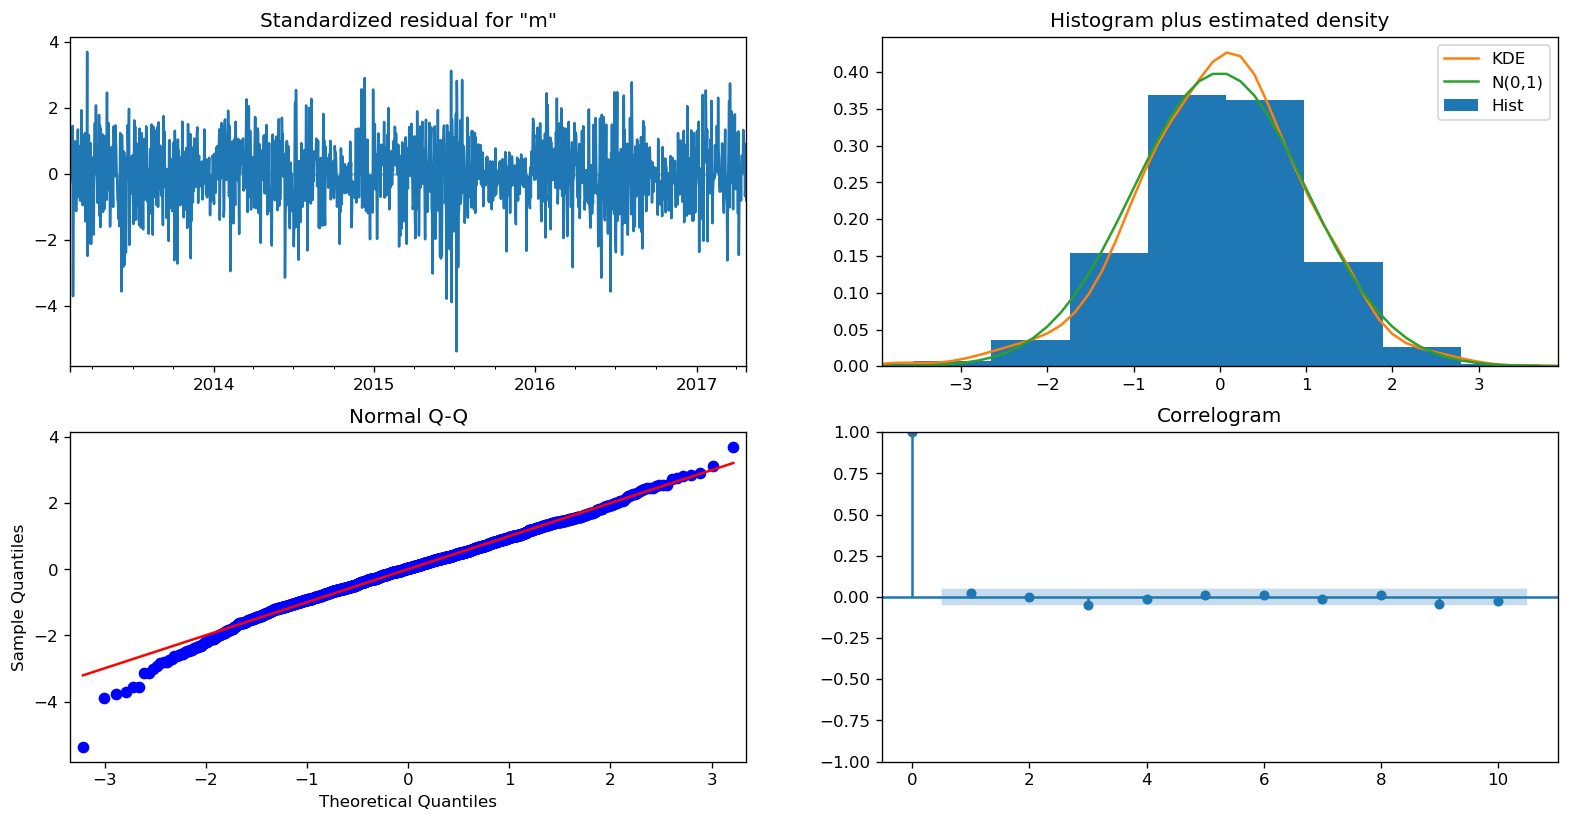

In [85]:
mod = sm.tsa.statespace.SARIMAX(df,
                                order=(3, 0, 2),
                                seasonal_order=(2, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

#model = SARIMAX(df_store_2_item_28_time, order=(1,1,1), freq='D')
results = mod.fit()

results.plot_diagnostics(figsize=(16, 8))
plt.show()

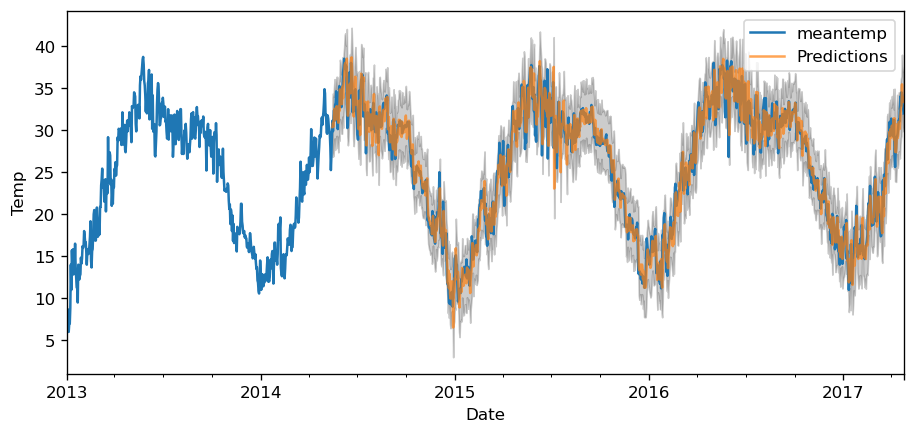

In [88]:
start_forecast = 500
pred = results.get_prediction(start=start_forecast, dynamic=False)
pred_ci = pred.conf_int()

ax = df.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Predictions', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Temp')
plt.legend()

plt.show()